# Logistic Regression Practice Exercise
## Chemotherapy for Stage B/C colon cancer
Description
These are data from one of the first successful trials of adjuvant chemotherapy for colon cancer. Levamisole is a low-toxicity compound previously used to treat worm infestations in animals; 5-FU is a moderately toxic (as these things go) chemotherapy agent. There are two records per person, one for recurrence and one for death

**Attribute Information**
- id:	id
- study:	1 for all patients
- sex:	1=male
- age:	in years
- obstruct:	obstruction of colon by tumour
- perfor:	perforation of colon
- adhere:	adherence to nearby organs
- nodes:	number of lymph nodes with detectable cancer
- time:	days until event or censoring
- status:	censoring status
- differ:	differentiation of tumour (1=well, 2=moderate, 3=poor)
- extent:	Extent of local spread (1=submucosa, 2=muscle, 3=serosa, 4=contiguous structures)
- surg:	time from surgery to registration (0=short, 1=long)
- node4:	more than 4 positive lymph nodes
- etype:	event type: 1=recurrence,2=death

**Loading Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

**Question 1: Import the Dataset**

In [2]:
df = pd.read_csv('colon.csv')

**Question 2: Get the Dimensionality of the Dataset.**

In [10]:
df.shape

(1858, 15)

**Question 3: How many Missing Values are there? Drop all missing values.**

In [9]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,id,study,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time,etype
0,1,1,1,43,0,0,0,5.0,1,2.0,3,0,1,1521,2
1,1,1,1,43,0,0,0,5.0,1,2.0,3,0,1,968,1
2,2,1,1,63,0,0,0,1.0,0,2.0,3,0,0,3087,2
3,2,1,1,63,0,0,0,1.0,0,2.0,3,0,0,3087,1
4,3,1,0,71,0,0,1,7.0,1,2.0,2,0,1,963,2


In [14]:
df.isna().sum()
df=df.dropna()

**Question 4: Generate the five point summary of the data set.**

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1776.0,466.506757,269.321338,1.0,234.75,466.5,700.25,929.0
study,1776.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
sex,1776.0,0.518018,0.499816,0.0,0.00,1.0,1.00,1.0
age,1776.0,59.810811,11.911137,18.0,53.00,61.0,69.00,85.0
obstruct,1776.0,0.192568,0.394427,0.0,0.00,0.0,0.00,1.0
perfor,1776.0,0.030405,0.171748,0.0,0.00,0.0,0.00,1.0
adhere,1776.0,0.144144,0.351335,0.0,0.00,0.0,0.00,1.0
nodes,1776.0,3.663288,3.539129,0.0,1.00,2.0,5.00,33.0
status,1776.0,0.493243,0.500095,0.0,0.00,0.0,1.00,1.0
differ,1776.0,2.061937,0.510833,1.0,2.00,2.0,2.00,3.0


**Question 5: How many levels are there in the Dependent Variable?**

In [16]:
df.etype.value_counts()

1    888
2    888
Name: etype, dtype: int64

**Question 6: With reference to the previous question, plot the levels of the dependent variable in a plot of your choice.**

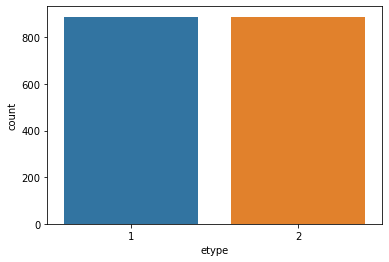

In [18]:
sns.countplot(data=df,x='etype');

**Question 7: Drop the dependent variable from the Data Set and store it seperately. Then split your data into train and test data sets. The test data size should be 30% of the total data. Use random_state=7.**

In [19]:
y = df['etype']
X = df.drop('etype',axis=1)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.30, random_state=7)

**Question 8: Formulate a logistic regression model on the train data.**

In [22]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

**Question 9: Get the Model Score.**

In [23]:
classifier.score(X_test,y_test)

0.5684803001876173

**Question 10: Generate the Confusion Matrix and Classification Report. What are your observations and recommendations?**

In [24]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.56      0.55      0.55       258
           2       0.58      0.59      0.58       275

    accuracy                           0.57       533
   macro avg       0.57      0.57      0.57       533
weighted avg       0.57      0.57      0.57       533



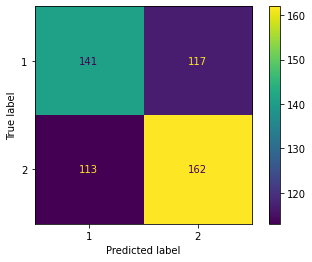

In [28]:
plot_confusion_matrix(estimator=classifier,X=X_test,y_true=y_test);